In [1]:
from __future__ import division, print_function
%matplotlib inline
import utils
from glob import glob
import numpy as np
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom
import cv2
from utils import *
import os, json
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = os.path.dirname('/home/paperspace/Documents/insight/') 
DATA_HOME_DIR = ROOT_DIR + '/data_crop/'

source_path = DATA_HOME_DIR+"train_full/"
export_path = DATA_HOME_DIR+'train_crop/'

crop_width = 450

anno_classes = ['alb', 'bet', 'dol', 'lag', 'other', 'shark', 'yft']

In [3]:
os.listdir(source_path)
print (export_path)
print (source_path)

/home/paperspace/Documents/insight/data_crop/train_crop/
/home/paperspace/Documents/insight/data_crop/train_full/


In [4]:
bb_json = {}

j = json.load(open('{}/all_fish_labels.json'.format("/home/paperspace/Documents/insight/data_crop"), 'r'))

for  i , l in enumerate(j):
    filename = l['filename'].split('/')[-1]
    if 'annotations' in l.keys() and len(l['annotations'])>0:
            bb_json[filename] = sorted(
                l['annotations'], key=lambda x: x['height']*x['width'])[-1]

    if len(l['annotations']) ==0:
        bb_json[filename]  = {'height': 0., 'width': 0., 'x': 0., 'y': 0.}

In [5]:
len(bb_json)

3312

In [13]:
for folder in glob(os.path.join(source_path, '*')):
       
    for f in glob(os.path.join(folder, '*')):
        img = cv2.imread(f)
        #plt.imshow(img)
        img_width = img.shape[1]
        img_height = img.shape[0]
        print (img_width)
        print (img_height)
        
        
        bb = bb_json[f.split('/')[-1]]
        x = bb['x'] #bottom left
        y = bb['y']
          
        print (x)
        print (y)
        
        #find center of the box

        cX = x + bb['width']/2
        cY = y + bb['height']/2
        
        print ('----')
        print (bb['width']) 
        print (bb['height'])


        #calculate boundries of bounding box (overriding x,y to make bbox bigger)
        x = max(cX - crop_width/2, 0)
        y = max(cY - crop_width/2, 0)
      
        if x + crop_width > img_width:
            x = img_width - crop_width
        if y + crop_width > img_height:
            y = img_height - crop_width

        
        x = int(x)
        y = int(y)
        
# ##### plot bounding box    
# #         cv2.rectangle(img,(x,y),(x+crop_width,y+crop_width),color=(255, 255, 255))
# #         plt.imshow(img)

            
    ##### crop the image and save
        crop_img = img[y:y+crop_width, x:x+crop_width]
#         plt.imshow(crop_img)
        
        foldername = folder.split('/')[-1]
        filename = f.split('/')[-1]
#         print(export_path+foldername+"/"+filename)
        cv2.imwrite(export_path+foldername+"/"+filename,crop_img)    
#         break

1280
720
376.713502711
416.896276334
----
143.988272147
87.0626761822
1280
974
618.653222735
479.723420316
----
349.105657359
153.179012923
1280
974
634.552966789
425.267687505
----
276.256568655
249.468052907
1280
750
78.6912650108
259.513746312
----
465.450461128
214.308125987
1280
750
608.0
548.0
----
664.0
198.0
1280
720
829.0
400.0
----
123.0
238.0
1280
720
275.0
412.0
----
139.0
62.0
1280
974
687.0
447.0
----
224.0
264.0
1280
974
515.678928156
373.364938243
----
154.033965553
309.74221334
1280
974
524.0
390.0
----
156.0
337.0
1280
720
376.713502711
51.9027492624
----
460.427614425
204.262432581
1280
720
566.0
77.0
----
444.0
256.0
1280
750
176.927697097
264.797828541
----
459.537038768
201.86381548
1280
750
97.1083695878
299.696519935
----
336.530729089
185.845328004
1280
974
459.0
489.0
----
430.0
303.0
1280
750
125.49
344.04
----
217.14
124.08
1280
974
630.0
434.0
----
255.0
200.0
1280
750
182.496763536
338.205011323
----
241.096641735
123.896885336
1192
670
789.6
297.51
----
1

In [8]:
print (x)

367


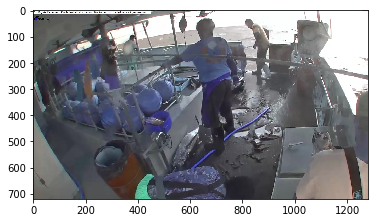

In [9]:
#### plot bounding box    
cv2.rectangle(img,(x,y),(x+crop_width,y+crop_width),color=(255, 255, 255))
plt.imshow(img)

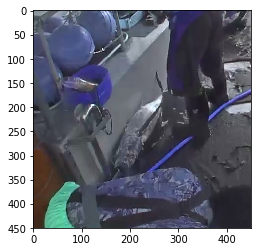

In [10]:
plt.imshow(crop_img)

In [ ]:
#         foldername = folder.split('/')[-1]
#         filename = f.split('/')[-1]
# #         print(export_path+foldername+"/"+filename)
#         cv2.imwrite(export_path+foldername+"/"+filename,crop_img)    
# #         break